# wrangling project

## 1. introduction

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

## 2. Gathering data

In [320]:
##Importin libraries
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline

### 1.A - Twitter Archive

In [321]:
tw_archive = pd.read_csv(r'C:\Users\Bushra\Documents\udacity\project 4\twitter-archive-enhanced.csv')

### 2.A - Image Prediction

In [322]:
url_p = 'https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv'
r = requests.get(url_p, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### 3.A - Tweet JSON

In [323]:
## as I dont have approval
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [324]:
response = requests.get('https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json')
with open('tweet-json.txt','wb') as file:
    file.write(response.content)

In [325]:
df_list = []
with open('tweet-json.txt') as file:
    lines = file.readlines()
for line in lines:
        tweet_json = json.loads(line)
        df_list.append({'id': tweet_json['id'],
                        'retweet_count': tweet_json['retweet_count'],
                        'favorite_count': tweet_json['favorite_count']})

In [326]:
df_tweet_json = pd.DataFrame(df_list)

## 3. Assessing Data

After gathering all three pieces of data, now we will assess them visually and programmatically for quality and tidiness issues.

### 3.A - Twitter Archive

In [327]:
tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [328]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [329]:
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [330]:
tw_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2283,667200525029539841,NaN,NaN,2015-11-19 04:39:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,None,None,None,None
1998,672538107540070400,NaN,NaN,2015-12-03 22:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672538107...,7,10,Darby,None,None,None,None
1708,680798457301471234,NaN,NaN,2015-12-26 17:12:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Moofasa. He must be a powerful do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,None,None,None,None
584,800141422401830912,NaN,NaN,2016-11-20 00:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peaches. She's the ultimate selfie sid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,None,None,None,None
1147,726935089318363137,NaN,NaN,2016-05-02 00:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprout. He's just precious af. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726935089...,12,10,Sprout,None,None,None,None
2036,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm just going to leave this one here as well....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906...,13,10,None,None,None,None,None
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This a Norwegian Pewterschmidt ...,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,None,None,None
2127,670319130621435904,NaN,NaN,2015-11-27 19:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670319130...,11,10,None,None,None,None,None
1852,675707330206547968,6.754971e+17,4.196984e+09,2015-12-12 16:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We've got ourselves a battle here. Watch out R...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675707330...,11,10,None,None,None,None,None
289,838201503651401729,NaN,NaN,2017-03-05 01:36:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sunny. He can take down a ...,8.207497e+17,4.196984e+09,2017-01-15 21:49:15 +0000,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None


### 3.B - Image Prediction

In [331]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [332]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [333]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [334]:
df_image_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
1832,836677758902222849,https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg,2,leopard,0.797410,False,jaguar,0.095487,False,snow_leopard,0.079694,False
282,671134062904504320,https://pbs.twimg.com/media/CVBY3e7XIAAAE4Y.jpg,1,Shih-Tzu,0.180380,True,golden_retriever,0.180194,True,Labrador_retriever,0.173656,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
1548,792883833364439040,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,jack-o'-lantern,0.999306,False,basketball,0.000113,False,standard_poodle,0.000083,True
178,669216679721873412,https://pbs.twimg.com/media/CUmJBS5WUAAKtrP.jpg,1,golden_retriever,0.992758,True,Irish_setter,0.003379,True,Saluki,0.001230,True
1005,709042156699303936,https://pbs.twimg.com/media/CdcGBB3WwAAGBuU.jpg,1,hotdog,0.826579,False,Rottweiler,0.068179,True,Labrador_retriever,0.049218,True
569,678389028614488064,https://pbs.twimg.com/media/CWofOHUWUAACGVa.jpg,1,miniature_pinscher,0.516284,True,kelpie,0.227402,True,vizsla,0.103246,True
884,698953797952008193,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,1,Italian_greyhound,0.382378,True,redbone,0.102255,True,shower_cap,0.076834,False
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False


### 3.C - Tweet JSON

In [335]:
df_tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [336]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [337]:
df_tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [338]:
df_tweet_json.sample(15)

,id,retweet_count,favorite_count
1770,678278586130948096,6857,12531
1558,688519176466644993,825,2520
1911,674372068062928900,346,931
1747,679047485189439488,781,2460
1464,694342028726001664,557,1727
578,800513324630806528,3495,14685
730,781655249211752448,1314,4466
549,804738756058218496,4480,15326
892,759197388317847553,2221,6725
2,891815181378084864,4328,25461


<a id='Q'></a>
### 1- Quality (12 issues)

**A.twitter archive:**
- 1. After create Stage of dog column (Tidyness issue), Change Stage of Dog column type + capitalize it.
- 2. Unnessecary columns should be dropped.(1)
- 3. Retweets which sould be deleted as we need just original ratings.
- 4. Change ID column type.(1)
- 5. Change Timestamp column type and adding column with the day's name.
- 6. Abnormal max and min rating denominator values.
- 7. Adding column that hold numerator values over denominator values.
- 8. Adjusting dogs names.

**B.Image Prediction:**
- 9. Change ID column type. (2)
- 10. Take only the true prediction with highest confidence.
- 11. Unnessecary columns should be dropped.(2)

**C.Tweet JSON:**
- 12. Change ID column type. (3)

<a id='T'></a>
### 2- Tidyness (7 issues)
**A.twitter archive**
- 1. Merge the last 4 columns to be 1 as stage of dog.
- 2. Rename columns to be descriptive and cabtalize them.

**B.Image Prediction:**
- 3. Capitalize predection column.
- 4. Rename columns to be descriptive and cabtalize them.
- 5. It could be merged with tw_archive file as the have common column 'tweet_id'.(1)

**C.Tweet JSON:**
- 6. Rename the ID column to match the other tabels.
- 7. It could be merged with tw_archive file as the have common column 'tweet_id'.(2)

## 4. Cleaning Data

We will clean all of the issues we have documented while assessing.

### 4.A - Twitter Archive

In [339]:
tw_archive_c = tw_archive.copy() #copying the table to apply changes. 
                                 #C at the end of the name referring to 'cleaned'

In [340]:
#check duplicate data for tweet_id 
tw_archive_c['tweet_id'].duplicated().sum()

0

#### *Test*

In [341]:
tw_archive_c.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### *Define*  
<li><a href="#T"> Tidyness (1) - Merge the las four columns to be one column 'stage of dog' </a></li> 

#### *Code* 

In [342]:

def SOD(tw_archive_c):
    if ((tw_archive_c['doggo'] != 'None')&(tw_archive_c['floofer'] == 'None')&
        (tw_archive_c['pupper'] == 'None')&(tw_archive_c['puppo'] == 'None')):
        return tw_archive_c['doggo']
    
    elif ((tw_archive_c['doggo'] == 'None')&(tw_archive_c['floofer'] != 'None')&
        (tw_archive_c['pupper'] == 'None')&(tw_archive_c['puppo'] == 'None')):
        return tw_archive_c['floofer']
    
    elif ((tw_archive_c['doggo'] == 'None')&(tw_archive_c['floofer'] == 'None')&
        (tw_archive_c['pupper'] != 'None')&(tw_archive_c['puppo'] == 'None')):
        return tw_archive_c['pupper']
    
    elif ((tw_archive_c['doggo'] == 'None')&(tw_archive_c['floofer'] == 'None')&
        (tw_archive_c['pupper'] == 'None')&(tw_archive_c['puppo'] != 'None')):
        return tw_archive_c['puppo']
    
    elif ((tw_archive_c['doggo'] == 'None')&(tw_archive_c['floofer'] == 'None')&
        (tw_archive_c['pupper'] == 'None')&(tw_archive_c['puppo'] == 'None')): 
        return 'None' 
    else: return 'Multiple' 
        
tw_archive_c['Stage_Of_Dog'] = tw_archive_c.apply(SOD, axis = 1)

#### *Test* 

In [343]:
tw_archive_c[(tw_archive_c['doggo'] != 'None')&(tw_archive_c['floofer'] != 'None')&
        (tw_archive_c['pupper'] == 'None')&(tw_archive_c['puppo'] == 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Stage_Of_Dog
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,Multiple


#### *Define* 
<li><a href="#Q"> Quality (1) - Change Stage of Dog column dtype + capitalize it </a></li> 

#### *Code* 

In [344]:
tw_archive_c['Stage_Of_Dog'] = tw_archive_c['Stage_Of_Dog'].str.capitalize()

#### *Test* 

In [345]:
tw_archive_c.info()
tw_archive_c.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Stage_Of_Dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


#### *Define*
<li><a href="#Q"> Quality (2) - Unnecessary columns should be dropped. </a></li> 

#### *Code*

In [346]:
tw_archive_c.drop(columns =['in_reply_to_status_id',
                  'in_reply_to_user_id',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp',
                  'source','doggo','floofer',
                  'pupper','puppo'],axis=1, inplace=True)

#### *Test*

In [347]:
tw_archive_c.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Stage_Of_Dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


#### *Define*
<li><a href="#Q"> Quality (3) - Retweets which sould be deleted as we need just original ratings. </a></li> 

#### *Code*

In [348]:
tw_archive_c.drop(tw_archive_c[tw_archive_c.text.str.contains('RT ')].index, inplace = True)

#### *Test*

In [349]:
tw_archive_c[tw_archive_c.text.str.contains('RT ')]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Stage_Of_Dog


#### *Define*
<li><a href="#Q"> Quality (4) - Change ID column type. </a></li>

<li><a href="#Q"> Quality (5) - Change Timestamp data type and adding column with the day's name. </a></li>

#### *Code*

In [350]:
tw_archive_c['tweet_id'] = tw_archive_c['tweet_id'].map(str)
tw_archive_c['timestamp'] = pd.to_datetime(tw_archive_c.timestamp)
tw_archive_c['Day'] =tw_archive_c['timestamp'].dt.day_name()

#### *Test*

In [351]:
tw_archive_c.info()
tw_archive_c.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2171 non-null   object             
 1   timestamp           2171 non-null   datetime64[ns, UTC]
 2   text                2171 non-null   object             
 3   expanded_urls       2113 non-null   object             
 4   rating_numerator    2171 non-null   int64              
 5   rating_denominator  2171 non-null   int64              
 6   name                2171 non-null   object             
 7   Stage_Of_Dog        2171 non-null   object             
 8   Day                 2171 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 169.6+ KB


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Stage_Of_Dog,Day
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,Saturday


#### *Define*
<li><a href="#Q"> Quality (6) - Abnormal denominator values. </a></li>

#### *Code*

In [352]:
tw_archive_c[tw_archive_c['rating_denominator']!= 10]['tweet_id'].count() #we will drop these rows 
                                                                         #since there a few of them

22

In [353]:
tw_archive_c.drop(tw_archive_c[tw_archive_c['rating_denominator'] != 10].index,inplace = True)

#### *Test*

In [354]:
tw_archive_c[tw_archive_c['rating_denominator']> 10]['tweet_id'].count()

0

#### *Define*
<li><a href="#Q"> Quality (7) - Adding column holds (numerator/denominator). </a></li>

#### *Code*

In [355]:
tw_archive_c['Rating'] = (tw_archive_c['rating_numerator']/tw_archive_c['rating_denominator'])

#### *Test*

In [356]:
tw_archive_c.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Stage_Of_Dog,Day,Rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,Tuesday,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Tuesday,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Monday,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Sunday,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,Saturday,1.2


#### *Define*
<li><a href="#Q"> Quality (8) - Adjusting dogs names. </a></li>

#### *Code*

In [359]:
tw_archive_c[tw_archive_c['name'].str.islower()] #to collect them

,Tweet_ID,Timestamp,Text,Expanded_URLs,Rating_Numerator,Rating_Denominator,Name,Stage_Of_Dog,Day,Rating
22,887517139158093824,2017-07-19 03:39:09+00:00,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,Wednesday,1.4
56,881536004380872706,2017-07-02 15:32:16+00:00,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,Pupper,Sunday,1.4
169,859196978902773760,2017-05-02 00:04:57+00:00,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,Tuesday,1.2
193,855459453768019968,2017-04-21 16:33:22+00:00,"Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,Friday,1.2
335,832645525019123713,2017-02-17 17:38:57+00:00,There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,Friday,1.0
...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,2015-11-16 00:35:11+00:00,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,Monday,0.2
2350,666050758794694657,2015-11-16 00:30:50+00:00,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,Monday,1.0
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,Monday,0.6
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,Sunday,0.9


In [360]:
def Names(tw_archive_c):
    if (tw_archive_c['name'].islower()):
        return 'None'
    else: return tw_archive_c['name']
        
tw_archive_c['name'] = tw_archive_c.apply(Names, axis = 1)

#### *Test*

In [361]:
tw_archive_c[tw_archive_c['name'].str.islower()]

,Tweet_ID,Timestamp,Text,Expanded_URLs,Rating_Numerator,Rating_Denominator,Name,Stage_Of_Dog,Day,Rating


#### *Define*
<li><a href="#T"> Tidyness (2) - Rename columns to be descriptive and cabtalize them. </a></li> 

#### *Code*

In [357]:
tw_archive_c.rename(columns = {'tweet_id':'Tweet_ID',
                               'timestamp': 'Timestamp',
                               'text' : 'Text',
                               'expanded_urls':'Expanded_URLs',
                               'rating_numerator' : 'Rating_Numerator',
                               'rating_denominator' : 'Rating_Denominator',
                               'name' : 'Name',
                               'stage of dog' : 'Stage_Of_Dog'},inplace = True)

#### *Test*

In [358]:
tw_archive_c.head()

,Tweet_ID,Timestamp,Text,Expanded_URLs,Rating_Numerator,Rating_Denominator,Name,Stage_Of_Dog,Day,Rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,Tuesday,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Tuesday,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Monday,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Sunday,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,Saturday,1.2


### 4.B - Image Prediction

In [362]:
image_p_c = df_image_predictions.copy() #copying the table to apply changes. 
                                        #C at the end of the name referring to 'cleaned'

In [363]:
image_p_c.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### *Define*
<li><a href="#Q"> Quality (9) - Change ID column dtype. </a></li>

#### *Code*

In [364]:
image_p_c['tweet_id'] = image_p_c['tweet_id'].map(str)

#### *Test*

In [365]:
image_p_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### *Define*
<li><a href="#Q"> Quality (10) - Take only the true prediction with highest confedence. </a></li>

#### *Code*

In [366]:
def PD (image_p_c):

    if (image_p_c['p1_dog'] == True):
        return 'p1'
    elif (image_p_c['p2_dog'] == True):
        return 'p2'
    elif (image_p_c['p3_dog']==True):
        return 'p3'
    else: ((image_p_c['p1_dog'] != True)&
          (image_p_c['p2_dog'] != True)&
          (image_p_c['p3_dog'] != True))
    return 'None'

image_p_c['Pred'] = image_p_c.apply(PD, axis=1)

In [367]:

image_p_c.loc[image_p_c['Pred']=='p1','Prediction'] = image_p_c['p1']
image_p_c.loc[image_p_c['Pred']=='p1','Confedince'] = image_p_c['p1_conf']

image_p_c.loc[image_p_c['Pred']=='p2','Prediction'] = image_p_c['p2']
image_p_c.loc[image_p_c['Pred']=='p2','Confedince'] = image_p_c['p2_conf']

image_p_c.loc[image_p_c['Pred']=='p3','Prediction'] = image_p_c['p3']
image_p_c.loc[image_p_c['Pred']=='p3','Confedince'] = image_p_c['p3_conf']

image_p_c.loc[image_p_c['Pred']=='None','Prediction'] = 'None'
image_p_c.loc[image_p_c['Pred']=='None','Confedince'] = 0


#### *Test*

In [368]:
image_p_c[(image_p_c['p2_dog']== True)&(image_p_c['p1_dog']!= True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Pred,Prediction,Confedince
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True,p2,Newfoundland,0.278407
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False,p2,Irish_terrier,0.104109
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True,p2,miniature_pinscher,0.167175
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False,p2,Rottweiler,0.062490
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,p2,vizsla,0.000081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,p2,French_bulldog,0.099984
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True,p2,pug,0.066736
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,p2,French_bulldog,0.099984
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True,p2,Labrador_retriever,0.033496


#### *Define*
<li><a href="#T"> Tidyness (3) - Capitalize predection column. </a></li> 

#### *Code*

In [369]:
image_p_c['Prediction'] = image_p_c['Prediction'].str.capitalize()

#### *Test*

In [370]:
image_p_c[image_p_c['Prediction'].str.islower()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Pred,Prediction,Confedince


#### *Define*
<li><a href="#T"> Tidyness (4) - Rename columns to be descriptive and cabtalize them. </a></li> 

#### *Code*

In [371]:
##rename columns that I will keep
image_p_c.rename(columns = {'tweet_id':'Tweet_ID',
                            'img_num': 'Image_Number'},inplace = True)

#### *Test*

In [372]:
image_p_c.head()

,Tweet_ID,jpg_url,Image_Number,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Pred,Prediction,Confedince
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,p1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,p1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,p1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,p1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,p1,Miniature_pinscher,0.560311


#### *Define*
<li><a href="#Q"> Quality (11) - drop unnecessary columns </a></li>

#### *Code*

In [373]:
image_p_c.drop(columns =['jpg_url','Pred','p1','p1_conf','p1_dog',
                         'p2','p2_conf','p2_dog','p3',
                         'p3_conf','p3_dog'],axis=1, inplace=True)

#### *Test*

In [374]:
image_p_c.head()

,Tweet_ID,Image_Number,Prediction,Confedince
0,666020888022790149,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,1,Redbone,0.506826
2,666033412701032449,1,German_shepherd,0.596461
3,666044226329800704,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,1,Miniature_pinscher,0.560311


#### *Define*
<li><a href="#T"> Tidyness (5) - It could be merged with tw_archive file as the have common column 'tweet_id'. </a></li> 

#### *Code*

In [375]:
tw_archive_c_m = pd.merge(tw_archive_c, image_p_c, on = ['Tweet_ID'], how = 'left')

                                  #to insert all the tweets' prediction data if
                                  #the tweet ID was found in the archive 

#### *Test*

In [376]:
tw_archive_c_m.head()

,Tweet_ID,Timestamp,Text,Expanded_URLs,Rating_Numerator,Rating_Denominator,Name,Stage_Of_Dog,Day,Rating,Image_Number,Prediction,Confedince
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,Tuesday,1.3,1.0,None,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Tuesday,1.3,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Monday,1.2,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Sunday,1.3,1.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,Saturday,1.2,2.0,Basset,0.555712


### 4.C - Tweet JSON

In [377]:
df_tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### *Define*
<li><a href="#T"> Tidyness (6) - Rename columns, especially the tweets'ID to match the other tables. </a></li> 

#### *Code*

In [378]:
df_tweet_json.rename(columns = {'id':'Tweet_ID',
                                'retweet_count': 'Retweet_Count',
                                'favorite_count':'Favorite_Count'},inplace = True)

#### *Test*

In [379]:
df_tweet_json.head()

,Tweet_ID,Retweet_Count,Favorite_Count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### *Define*
<li><a href="#Q"> Quality (12) - Change Tweet ID column dtype. </a></li>

#### *Code*

In [380]:
df_tweet_json['Tweet_ID'] = df_tweet_json['Tweet_ID'].map(str)

#### *Test*

In [381]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet_ID        2354 non-null   object
 1   Retweet_Count   2354 non-null   int64 
 2   Favorite_Count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### *Define*
<li><a href="#T"> Tidyness (7) - It could be merged with tw_archive file as the have common column 'tweet_id'. </a></li> 

#### *Code*

In [382]:
tw_archive_c_m = pd.merge(tw_archive_c_m, df_tweet_json, on = ['Tweet_ID'], how = 'left')


#### *Test*

In [383]:
tw_archive_c_m.head()

,Tweet_ID,Timestamp,Text,Expanded_URLs,Rating_Numerator,Rating_Denominator,Name,Stage_Of_Dog,Day,Rating,Image_Number,Prediction,Confedince,Retweet_Count,Favorite_Count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,Tuesday,1.3,1.0,None,0.000000,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Tuesday,1.3,1.0,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Monday,1.2,1.0,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Sunday,1.3,1.0,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,Saturday,1.2,2.0,Basset,0.555712,9774,41048


## 5. Storing Data

In [384]:
tw_archive_c_m.to_csv(r'C:\Users\Bushra\Documents\udacity\project 4\twitter_archive_master.csv')

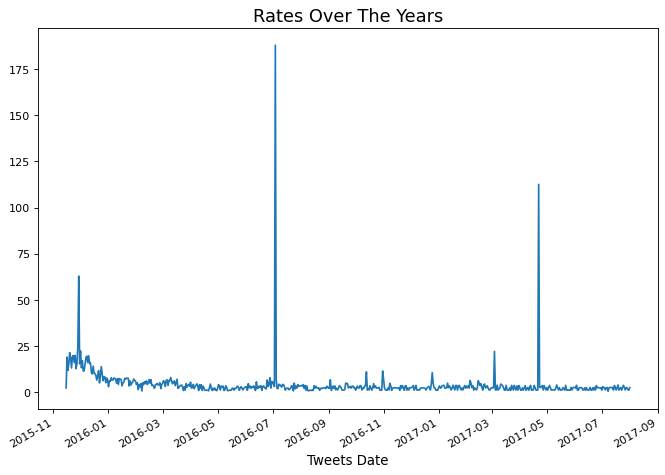

In [393]:
tw_archive_c_m_g = pd.DataFrame(tw_archive_c_m.groupby(tw_archive_c_m.Timestamp.dt.date)['Rating'].apply(sum))
tw_archive_c_m_g.reset_index(inplace=True) #to set the columns labels at the same level

tw_archive_c_m_g = tw_archive_c_m_g.set_index(tw_archive_c_m_g['Timestamp']) #to set the dates as x-axis
plt.figure(figsize=(10,7), dpi=80)
plt.plot(tw_archive_c_m_g['Rating'],label = 'Total Rates')
plt.gcf().autofmt_xdate()
plt.xlabel('Tweets Date',fontsize=12)
plt.title('Rates Over The Years',fontsize=16)
plt.show()

> Are those ratings fair enough?
>- is there any relationship between the dog's rate and their breed? 
>- do the day where the tweet was posted have any effect on the rate?

>- what are the most popular dog breeds?
>- what about the stage of dog? do peopel like dogs when they're younger?